<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_exatas/blob/main/CN_Modulo2_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Construindo a curva tridimensional de Capa

Segue o código em Python empregado para criar a curva tridimensional de capa da apresentação do Módulo 2.

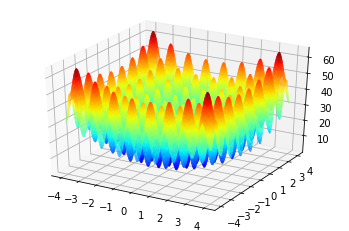

In [ ]:
# rastrigin_3d.py

from matplotlib import cm  # color map
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-4, 4, 200)
Y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(X, Y)

Z = (X**2 - 10 * np.cos(2 * 3.14 * X)) + \
  (Y**2 - 10 * np.cos(2 * 3.14 * Y)) + 20

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, \
  cstride=1, cmap=cm.jet)

plt.show()

# 2.Criando gráficos de valores

Para realizar uma primeira identificação de um intervalo $[ a, b]$, que contém um zero da função $f(x)$, é possível empregar ferramentas computacionais que facilitam a criação de gráficos.

Uma primeira possibilidade é elaboração de gráficos a partir de valores de coordenadas $x$ e $y$.

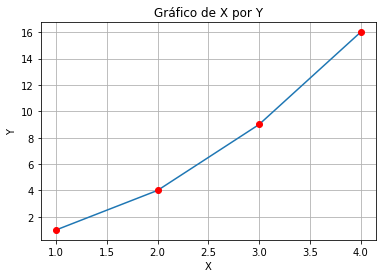

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
plt.plot(x, y)
plt.plot(x, y,'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de X por Y')
plt.grid()
plt.show()

# 3. Criando gráficos de funções

Para realizar uma primeira identificação de um intervalo $[ a, b]$, que contém um zero da função $f(x)$, é possível empregar ferramentas computacionais que facilitam a criação de gráficos.

Uma primeira possibilidade é elaboração de gráficos a partir de valores de expressões matemáticas que relacionam $x$ e $y$.

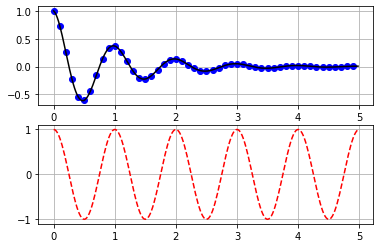

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()

plt.subplot(211)
plt.grid()
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.grid()
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

# 4. Método da Equação Equivalente

A partir da equação **$f(x) = 0$**, pode-se obter a equação equivalente **$g(x) = h(x)$**.

Ao se localizar os pontos **x** onde as duas curvas **g(x)** e **h(x)** se interceptam são soluções de **f(x) = 0**:

**f($\xi$) = 0 $\leftrightarrow$ g($\xi$) = h($\xi$)**.


Para ilustrar a aplicação deste método segue o seguinte programa em Python:

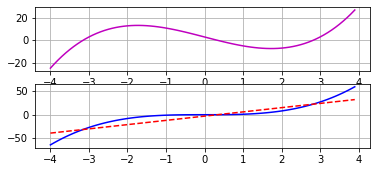

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.power(x,3) - 9*x + 3

def g(x):
    return np.power(x,3)

def h(x):
    return 9*x - 3

x = np.arange(-4.0, 4.0, 0.1)

plt.figure()

plt.subplot(311)
plt.grid()
plt.plot(x, f(x), 'm')

plt.subplot(312)
plt.grid()
plt.plot(x, g(x), 'b', x, h(x), 'r--')
plt.show()

# 5. Método da Bisecção para encontrar raízes

Seja a função **f(x)** contínua no intervalo **$[a, b]$**, e tal que **f(a)f(b) < 0**.

Suponha que o intervalo **$(a, b)$** contém uma única raiz **$\xi$** de **f(x)**, isto é, **$f(\xi) = 0$**.

O método da bisecção consiste em dividir o intervalo em partes menores até que **$(b - a) < \epsilon$**. Usa-se: **$x_k = (b_k-a_k)/2$**.

Antes de elaborar uma função associada ao método da Bisecção, serão realizados alguns estudos computationais acerca dos passos necessários para a correta aplicação do método.

Para tanto, os estudos serão realizados com a função **$f(x) = xlog_{10}(x) - 1$**.


# 5.1 Construindo o gráfico da função

Em primeiro lugar é construída uma figura que permite verificar se o intervalo **$[a, b]$** contém ou não uma raiz da função, isto é, se existe um valor **$\xi \in (a,b)$** tal que **$f(\xi) = 0$**.

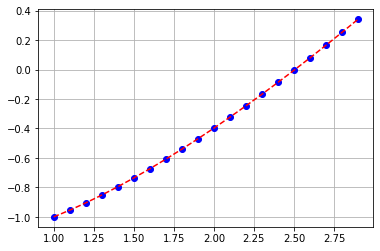

In [ ]:
# Construindo o gráfico
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.log10(x)*x - 1


x = np.arange(1.0, 3.0, 0.1)

plt.figure()
plt.grid()
plt.plot(x, f(x), 'bo', x, f(x), 'r--')
plt.show()

# 5.2 Entendendo a aplicação do método da Bisecção

Agora o método será aplicado passo por passo, antes de se proceder a sua automação através do comando de repetição **while** ou **for**.

[ 2.0 , 3.0 ]


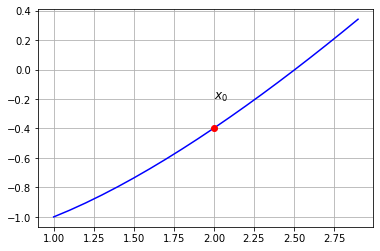

In [ ]:
# Construindo o gráfico
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.log10(x)*x - 1


x = np.arange(1.0, 3.0, 0.1)

plt.figure()
plt.grid()
plt.plot(x, f(x), 'b-')

# Intervalo inicial [a,b].
b = 3.0
a = 1.0
# Critério de parada: precisão.
eps = 0.1

# Verificando o critério de parada.
if (b-a) > eps:
  # Cálculo do primeiro valor x0.
  x0 = (b+a)/2
  # Se f(x0) e f(b) tem o mesmo sinal seu produto é > 0.
  if f(x0)*f(b) > 0:
    b = x0
  else:
    a = x0

plt.plot(x0, f(x0), 'ro')
plt.text(x0, 0.5*f(x0), '$x_0$', fontsize=12)

print('[',a,',',b,']')
plt.show()

# 5.3 Método da Bisecção

Agora o método será criado de modo que será empregado o comando de repetição **while**.

É importante destacar que o critério de parada será incorporado na expressão lógica a ser avaliada em conjunto com o comando **while**.

[ 2.0 , 3.0 ]
[ 2.5 , 3.0 ]
[ 2.5 , 2.75 ]
[ 2.5 , 2.625 ]
[ 2.5 , 2.5625 ]
Número de iterações: 4
Precisão: 0.0625


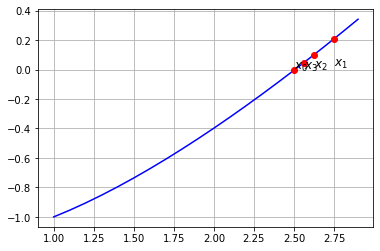

In [ ]:
# Construindo o gráfico
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.log10(x)*x - 1


x = np.arange(1.0, 3.0, 0.1)

plt.figure()
plt.grid()
plt.plot(x, f(x), 'b-')

# Intervalo inicial [a,b].
b = 3.0
a = 2.0
# Critério de parada: precisão.
eps = 0.1
# Critério de parada: # iterações.
maxiter = 20
# Lista para armazenar os sucessivos valores.
xk = []
# Número inicial de iterações.
iter = 0

# Critério de parada: precisão + # iterações.
while ((b-a) > eps)&(iter <= maxiter):
  print('[',a,',',b,']')
  # Cálculo do primeiro valor x0.
  x0 = (b+a)/2
  # Guardando o valor de x0 em xk.
  xk.append(x0)
  # Se f(x0) e f(b) mesmo sinal, produto é > 0.
  if f(x0)*f(b) > 0:
    b = x0
  else:
    a = x0
  iter = iter + 1

# Gerando os gráficos dos sucessivos pontos obtidos.
cont = 0
for x in xk:
  plt.plot(x, f(x), 'ro')
  name = '$x_'+str(cont)+'$'
  plt.text(x, 0.1*f(x), name, fontsize=12)
  cont = cont + 1

print('[',a,',',b,']')
print('Número de iterações:',iter)
print('Precisão:',(b-a))
plt.show()

# 5.4 Estimativa do número de iterações

A fórmula dada a seguir fornece a estimativa do número **$n$** de iterações do método da Bisecção.

$k = \frac{log(b_0 - a_0)-log(\epsilon)}{log(2)}$,

onde:

* Intervalo inicial: $[a_0,b_0]$;

* Precisão requerida: $\epsilon$;

O código a seguir emprega essa equação.

In [ ]:
# Construindo o gráfico
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.log(x)*x - 1

# Intervalo inicial [a,b].
b = 3.0
a = 2.0
# Critério de parada: precisão.
eps = 0.1

# Número estimado de iterações.
k = (np.log(b - a) - np.log(eps))/(np.log(2))
k2 = np.ceil(k)

print('Intervalo inicial: [',a,',',b,']')
print('Precisão requirida:',(eps))
print('Estimativa de iterações:',k)
print('Estimativa 2 de iterações:',k2)

Intervalo inicial: [ 2.0 , 3.0 ]
Precisão requirida: 0.1
Estimativa de iterações: 3.321928094887362
Estimativa 2 de iterações: 4.0


# 6. Método da Falsa Posição

Seja a função **f(x)** contínua no intervalo **$[a, b]$**, e tal que **f(a)f(b) < 0**.

Suponha que o intervalo **$(a, b)$** contém uma única raiz **$\xi$** de **f(x)**, isto é, **$f(\xi) = 0$**.

O método da bisecção consiste em dividir o intervalo em partes menores até que **$(b - a) < \epsilon$**. Usa-se: **$x_k = (a_kf(b_k)-b_kf(a_k))/(f(b_k)-f(a_k))$**.

Antes de elaborar uma função associada ao **Método da Falsa Posição**, serão realizados alguns estudos computationais acerca dos passos necessários para a correta aplicação do método.

Para tanto, os estudos serão realizados com a função **$f(x) = xlog(x) - 1$**.


[ 2.0 , 3.0 ]
[ 2.47984830373263 , 3.0 ]
[ 2.5049642922892947 , 3.0 ]
[ 2.506127958861449 , 3.0 ]
[ 2.5061815582843536 , 3.0 ]
[ 2.506184026449166 , 3.0 ]
[ 2.506184140102659 , 3.0 ]
[ 2.506184145336146 , 3.0 ]
[ 2.5061841455771363 , 3.0 ]
[ 2.5061841455882337 , 3.0 ]
[ 2.506184145588745 , 3.0 ]
[ 2.506184145588769 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
[ 2.5061841455887692 , 3.0 ]
Número de iterações: 21
Precisão: 0.49381585441123077


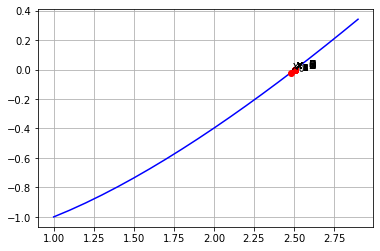

In [ ]:
# Construindo o gráfico
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (np.log10(x)*x - 1)


x = np.arange(1.0, 3.0, 0.1)

plt.figure()
plt.grid()
plt.plot(x, f(x), 'b-')

# Intervalo inicial [a,b].
b = 3.0
a = 2.0
# Critério de parada: precisão.
eps = 0.1
# Critério de parada: # iterações.
maxiter = 20
# Lista para armazenar os sucessivos valores.
xk = []
# Número inicial de iterações.
iter = 0

# Critério de parada: precisão + # iterações.
while ((b-a) > eps)&(iter <= maxiter):
  print('[',a,',',b,']')
  # Cálculo do primeiro valor x0.
  x0 = (a*f(b)-b*f(a))/(f(b)-f(a))
  # Guardando o valor de x0 em xk.
  xk.append(x0)
  # Se f(x0) e f(b) mesmo sinal, produto é > 0.
  if f(x0)*f(b) > 0:
    b = x0
  else:
    a = x0
  iter = iter + 1

# Gerando os gráficos dos sucessivos pontos obtidos.
cont = 0
for x in xk:
  plt.plot(x, f(x), 'ro')
  name = '$x_'+str(cont)+'$'
  plt.text(x, 0.1*f(x), name, fontsize=12)
  cont = cont + 1

print('[',a,',',b,']')
print('Número de iterações:',iter)
print('Precisão:',(b-a))
plt.show()

# 7. Método do ponto fixo

Seja a função $f(x)$ contínua no intervalo $[a, b]$, e tal que contém uma única raiz $\xi$ de $f(x)$, isto é, $f(\xi) = 0$. O método do ponto fixo transforma $f(x)$ em uma equação equivalente $x = \varphi(x)$. A partir de um valor inicial $x_0$, uma sequência ${x_k}$ de aproximações para $\xi$ é gerada $x_{k+1} = \varphi(x_k)$. Pode-se provar que: $f(\xi) = 0 \leftrightarrow \varphi(\xi)= \xi$.




# 7.1. Exemplo Numérico

Para ilustrar o funcionamento do método, será considerada a equação $x^2 + x - 6 = 0$ com raízes reais $\xi_1 = -3$ e $\xi_2 = 2$.

É possível utilizar duas funções de iteração: $\varphi_1(x) = 6 - x^2$ ou $\varphi_2 = \sqrt{6 - x}$.

Em primeiro lugar é necessário elaborar o gráfico da função para escolher um valor inicial para o processo iterativo.

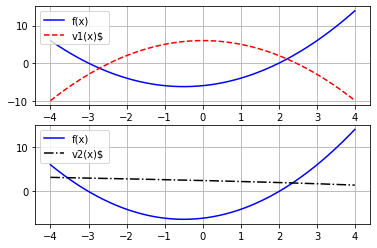

In [ ]:
# Construindo o gráfico
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (np.power(x,2) + x - 6)

def v1(x):
    return (6 - np.power(x,2))

def v2(x):
    return (np.sqrt(6 - x))


x = np.arange(-4.0, 4.0, 0.01)

plt.figure()
plt.subplot(211)
plt.grid()
plt.plot(x, f(x), 'b-',label='f(x)')
plt.plot(x, v1(x), 'r--',label='v1(x)$')
plt.legend()

plt.subplot(212)
plt.grid()
plt.plot(x, f(x), 'b-',label='f(x)')
plt.plot(x, v2(x), 'k-.',label='v2(x)$')
plt.legend()
plt.show()

# 7.2. Avaliação das funções de iteração

A partir dos gráficos gerados, foi escolhido como ponto inicial o valor 1,5.

Esse será o valor inicial para o qual será avaliado o desempenho da primeira e da segunda função de iteração.


In [ ]:
# Realizando o processo iterativo
import matplotlib.pyplot as plt
import numpy as np

def v1(x):
    return (6 - np.power(x,2))

def v2(x):
    return (np.sqrt(6 - x))

# Função 1: 6 - x^2.
print("Função V1")
xk = 1.5
for i in range(0,5):
    print("x",i," = ",xk)
    xk = v1(xk)

# Função 2: sqrt(6 - x).
print("Função V2")
xk = 1.5
for i in range(0,5):
    print("x",i," = ",xk)
    xk = v2(xk)


Função V1
x 0  =  1.5
x 1  =  3.75
x 2  =  -8.0625
x 3  =  -59.00390625
x 4  =  -3475.460952758789
Função V2
x 0  =  1.5
x 1  =  2.1213203435596424
x 2  =  1.9694363803993156
x 3  =  2.0076263645411423
x 4  =  1.9980924992249127


# 8. Método de Newton

O método de Newton pode ser visto como um método do ponto fixo para o qual a função de iteração $\varphi(x)$ é escolhida de modo que $\varphi'(x) = 0$. Isto é feito, pois quanto menor o valor $\varphi'(x)$, mais rápida a convergência do método. Com isso a equação para a obtenção da sequência de aproximações ${x_k}$ será dada por:

$x_{k+1} = x_{k} - \frac{f(x_{k})}{f'(x_{k})}$


[ 1.5 ]
[ -1.6666666666666665 ]
[ 18.38888888888885 ]
[ 12.366010403481946 ]
[ 8.402306719815135 ]
[ 5.835338164832407 ]
[ 4.233873551002962 ]
[ 3.3229109605612748 ]
[ 2.9173389311078615 ]
[ 2.8221916654111676 ]
Número de iterações: 8
Precisão |f(xk)|: 0.07837065861518155
Precisão |xk-x0|: 0.09514726569669385


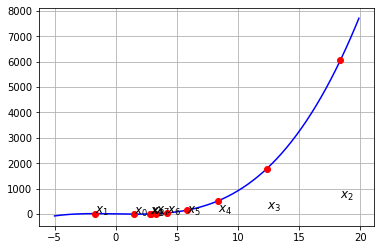

In [ ]:
# Construindo o gráfico
import matplotlib.pyplot as plt
import numpy as np
import math

def f(x):
    return np.power(x,3) - 9*x + 3

def df(x):
    return 3*np.power(x,2) - 9


x = np.arange(-5.0, 20.0, 0.1)

plt.figure()
plt.grid()
plt.plot(x, f(x), 'b-')

# Valor inicial.
x0 = 1.5
# Critério de parada: precisão.
eps1 = 0.1
eps2 = eps1
# Critério de parada: # iterações.
maxiter = 20
# Lista para armazenar os sucessivos valores.
lista = [x0]
# Número inicial de iterações.
iter = 0

# Critério de parada: precisão + # iterações.
while ((math.fabs(f(x0))) > eps1)&(iter <= maxiter):
  print('[',x0,']')
  # Cálculo do valor xk.
  xk = x0 - f(x0)/df(x0)
  # Guardando o valor de x0 em xk.
  lista.append(xk)
  # Se |f(xk)| < eps1 ou  e |xk - x0| < eps2: pare.
  if (math.fabs(f(x0)) < eps1)|((math.fabs(xk-x0)) < eps2):
    break
  else:
    x0 = xk
  iter = iter + 1

# Gerando os gráficos dos sucessivos pontos obtidos.
cont = 0
for x in lista:
  plt.plot(x, f(x), 'ro')
  name = '$x_'+str(cont)+'$'
  plt.text(x, 0.1*f(x), name, fontsize=12)
  cont = cont + 1

print('[',xk,']')
print('Número de iterações:',iter)
print('Precisão |f(xk)|:',math.fabs(f(xk)))
print('Precisão |xk-x0|:',math.fabs(xk-x0))
plt.show()

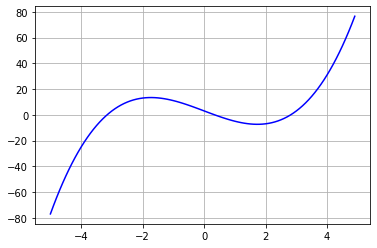

In [ ]:
# Construindo o gráfico
import matplotlib.pyplot as plt
import numpy as np
import math

def f(x):
    return np.power(x,3) - 9*x + 3

x = np.arange(-5.0, 5.0, 0.1)

plt.figure()
plt.grid()
plt.plot(x, f(x), 'b-')
plt.show()

# 9. Método da Secante

O **método da Secante** aproxima o valor da **derivada** é **aproximada** pelo **quociente das diferenças**:

$f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$

 Relembrando que a equação para a obtenção da sequência de aproximações ${x_k}$ no **método de Newton** é dada por:

$x_{k+1} = x_{k} - \frac{f(x_{k})}{f'(x_{k})}$

Substituindo pela aproximação é obtido:

$x_{k+1} = x_{k} - \frac{f(x_{k})}{f(x_{k})-f(x_{k-1})} (x_{k}-x_{k-1})$


[ 1.5 ]
[ 1.7 ]
[ -3.938931297709913 ]
[ 4.4268399316915685 ]
[ -1.3265215811468547 ]
[ -3.2703738428866176 ]
[ -2.9438836115224447 ]
[ -3.1430857442004028 ]
[ -3.155707371883308 ]
x* = [ -3.155707371883308 ]
Número de iterações: 6
Precisão |f(xk)|: 0.024710856685615568
Precisão |xk-x0|: 0.012621627682905423


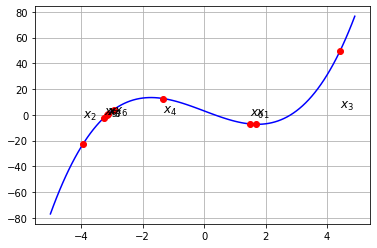

In [ ]:
# Construindo o gráfico
import matplotlib.pyplot as plt
import numpy as np
import math

def f(x):
    return np.power(x,3) - 9*x + 3

x = np.arange(-5.0, 5.0, 0.1)

plt.figure()
plt.grid()
plt.plot(x, f(x), 'b-')

# Valores iniciais.
x0 = 1.5
x1 = 1.7
# Critério de parada: precisão.
eps1 = 0.1
eps2 = eps1
# Critério de parada: # iterações.
maxiter = 20
# Lista para armazenar os sucessivos valores.
lista = [x0, x1]
print('[',x0,']')
print('[',x1,']')
# Número inicial de iterações.
iter = 0

# Critério de parada: precisão + # iterações.
while True:
  # Cálculo do valor x2.
  x2 = x1 - (f(x1)*(x1-x0))/(f(x1)-f(x0))
  print('[',x2,']')
  # Guardando o valor de x0 em xk.
  lista.append(x2)
  # Se |f(xk)| < eps1 ou  e |xk - x0| < eps2: pare.
  if ((math.fabs(f(x2)) < eps1)|((math.fabs(x2-x1)) < eps2))&(iter <= 20):
    break
  else:
    x0 = x1
    x1 = x2
  iter = iter + 1

# Gerando os gráficos dos sucessivos pontos obtidos.
cont = 0
for x in lista:
  plt.plot(x, f(x), 'ro')
  name = '$x_'+str(cont)+'$'
  plt.text(x, 0.1*f(x), name, fontsize=12)
  cont = cont + 1

print('x* = [',x2,']')
print('Número de iterações:',iter)
print('Precisão |f(xk)|:',math.fabs(f(x2)))
print('Precisão |xk-x0|:',math.fabs(x2-x1))
plt.show()